## Theory

- **Defintion 41.1** The joint distribution of 2 continuous random variables is given by their joint PDF $f(x,y)$

$$\begin{align}
    f(x,y) &= P((X,Y) \in B) \\
    &= \iint_{B} f(x,y) \text{ }d(y)\text{ }d(x)
\end{align}$$

- Intuitively, double integral means that we have some 2D plane, and we want to find the volume enclosed by that plane fulfilling condition $B$

![Alt text](image.png)

#### Example 41.1 (Joint Distribution of the First and Second Arrival Times)

- In San Luis Obispo, radioactive particles reach a Geiger counter according to a Poisson process at a rate of $\lambda = 0.8$ particles per second. 

- The time $X$ that the first particle is detected and the time $Y$ that the second particle is detected can be shown to have the joint p.d.f.:
$$ f(x,y) = \begin{Bmatrix} 0.64e^{-0.8y} & 0 \lt x \lt y \\ 0 & \text{otherwise} \end{Bmatrix}$$

- Let's prove this
    - If particles arrive following a $\text{Poisson}(\lambda = 0.8)$ process, then the time taken for a particle to arrive in independent periods follow a $\text{Exponential}(\lambda)$ process
    - From Chapter 35, the PDF of an exponential process is given by $f(T) = \lambda e^{-\lambda t}$
    - Let X be the time taken for the first particle to arrive
    - Let A be the time taken for the second particle to arrive after the first, where $A = Y - X$
    - Since these are independent time periods, X and A are independent
    - Hence, the joint probability $f(X,Y)$ is simply $f(X) \cdot f(A)$
    - $$\begin{align} 
        f(X,Y) &= f(X) \cdot f(A) \\
        &= \lambda e^{-\lambda X} \cdot \lambda e^{-\lambda (Y-X)} \\
        &= \lambda^2 e^{-\lambda X + \lambda X - \lambda Y} \\
        &= 0.64 e^{-0.8 Y}
        \end{align}$$

- Since we want the joint probability over the space where $0 < X < Y$, the joint PDF is only defined over the following region
    - $ f(x,y) = \begin{Bmatrix} 0.64 e^{-0.8Y} & 0 \lt x \lt y \\ 0 & \text{otherwise} \end{Bmatrix} $
    - The region $0 \lt x \lt y$ is known as the **support** of the distribution
    

- Compute $P(1 \lt X \lt 2 \text{ and } 1 \lt Y \lt 2)$
    - Imagine an $\mathbb{R}^3$ space, with X and Y axis lying on the flat plane as you look downwards onti the space, and the final Z axis representing the value of the joint PDF over X and Y.
    - The condition $1 \lt X \lt 2 \text{ and } 1 \lt Y \lt 2$ can be thought of as a square with sides of length 1, extending across the entire Z axis
    - In addition, we know that $0 \lt X \lt Y$. 
    - So we want to find the volume of the space enclosed by the joint PDF within this square, and the area above the identity line.

![Alt text](image-1.png)

$$\begin{align}
    P(1 \lt X \lt 2 \text{ and } 1 \lt Y \lt 2) &= \int_1^2 \int_x^2 0.64 e^{-0.8y} dy dx \\
    &= \int_1^2 [-\frac{1}{0.8} * 0.64 e^{-0.8y}]^{2}_x dx \\
    &= \int_1^2 [-0.8 e^{-0.8y}]^{2}_x dx \\
    &= \int_1^2 -0.8 e^{-1.6} + 0.8 e^{-0.8x}  dx \\
    &= [-0.8x e^{-1.6} - \frac{1}{0.8} 0.8 e^{-0.8x}]^2_1 \\
    &= -1.6 e^{-1.6} - e^{-1.6} + 0.8 e^{-1.6} + e^{-0.8} \\
    &= 0.0859
\end{align}$$

#### Example 41.2

- Two insurers provide bids on an insurance policy to a large company. The bids must be between 2000 and 2200. The company decides to accept the lower bid if the two bids differ by 20 or more. Otherwise, the company will consider the two bids further. Suppose the 2 bids X and Y are equally likely to be any of the allowable bids. That is, their joint p.d.f. is as follows, with c as a constant. What is the probability that the company considers the two bids further?
$$ f(x,y) = \begin{Bmatrix} c & 2000 \lt (x, y) \lt 2200 \\ 0 & \text{otherwise} \end{Bmatrix} $$


- Method 1: Geometric 
    - In $\mathbb{R}^3$ space, imagine X and Y as a plane seen from a top down view
    - The company will consider 2 bids further if $\left | x-y \right | \lt 20$
    - Across the XY plane, imagine a diagonal line. This is where x = y. For each x value on the line, condition is met when $y = x \pm 20$ (you can also think about this from the y perspective). This gives us a shaded box around the diagonal line.
    - Since the joint PDF of $f(x,y)$ is constant, there is no need to consider the actual value of the PDF. We just need to find the area of the blue box relative to the support of the distribution
    - However, due to the condition that $2000 \lt (x,y) \lt 2200$, the shaded area is not precisely a box. Rather, it is an irregular hexagon.
    - The simplest way of finding the area is to subtract the area of the "white spaces", which happens to simply be 2 triagles of base and height = 180!
    - Thus, shaded area is $\frac{200^2 - 2*\frac{1}{2}*180*180}{200^2} = 0.19$

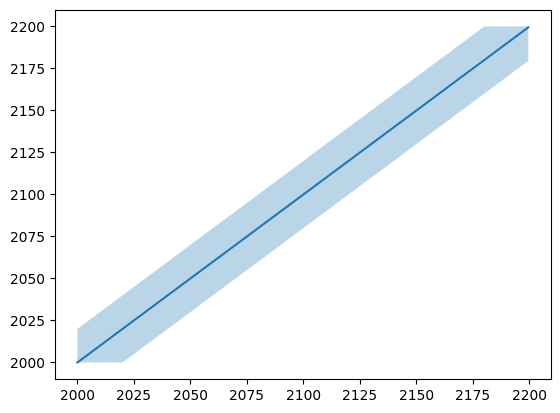

In [12]:
import numpy as np
import matplotlib.pyplot as plt

xvals = np.arange(2000,2200,0.5)
yval_ul = xvals + 20 #if (xvals+20 > 2000) & (xvals+20 < 2200) else xvals
yval_ul = np.where(yval_ul > 2200, 2200, yval_ul)
yval_ll = xvals - 20 #if (xvals-20 > 2000) & (xvals-20 < 2200) else xvals
yval_ll = np.where(yval_ll < 2000, 2000, yval_ll)
plt.plot(xvals, xvals)
plt.fill_between(xvals, yval_ll, yval_ul, alpha=0.3)

- Method 2 (Calculus)
    - Since f(x,y) is constant, it stands to reason that both X and Y follow independent uniform distribution between 2000 and 2200. Let's try to set up the double integration $\int \int f(x,y) dx dy$
    - First, let's recognise that we want the region where $\left | x -y \right | \lt 20$. Rewriting, we want $-20 \lt x - y \lt 20$
    - We can split this into 2 symmetric regions; (i) $y-x \lt 20, y \gt x$ and (ii) $x-y \lt 20, x \gt y$. Let's just focus on one, and the other will have the same value
    - Assuming $y \gt x$, we want to find the area where $y-x \lt 20$
    - We know that, for a uniform distribution X, $f(x) = \frac{1}{b-a} = \frac{1}{2200-2000} = \frac{1}{200}$

$$\begin{align}
    \text{For } y \gt x \\
    \frac{f(x,y)}{2} &= \int_{x=2000}^{2200} \int_{y=x}^{2200} f(x) f(y) dy dx - \int_{x=2000}^{2180} \int_{y=x+20}^{2200} f(x) f(y) dy dx \\
    &= \int_{x=2000}^{2200} \int_{y=x}^{2200} \frac{1}{200^2} dy dx - \int_{x=2000}^{2180} \int_{y=x+20}^{2200} \frac{1}{200^2} dy dx \\
    &= \int_{x=2000}^{2200} [\frac{y}{200^2}]^{2200}_{x} dx - \int_{x=2000}^{2180} [\frac{y}{200^2}]^{2200}_{x+20} dx \\
    &= \int_{x=2000}^{2200} \frac{2200 - x}{200^2} dx - \int_{x=2000}^{2180} \frac{2200 - x - 20}{200^2} dx \\
    &= [\frac{2200x}{200^2} - \frac{x^2}{2 \cdot 200^2}]^{2200}_{2000} - [\frac{2180x}{200^2} - \frac{x^2}{2 \cdot 200^2}]^{2180}_{2000} \\
    &= 0.5 - 0.405 \\
    &= 0.095  \\ \\

    f(x,y) &= 0.19
\end{align}$$